Dallo spettro del CMB, voglio generare la mappa delle fluttuazioni.

In [82]:
import numpy as np
import matplotlib.pyplot as plt

import camb
import healpy as hp #gestisce mappe sul piano del cielo

Mappe a varie risoluzioni.

In [83]:
n_side=256

A quanti pixel corrisponde n_side?

In [84]:
hp.nside2npix(n_side)

786432

- A che scala angolare corrisponde ogni pixelizzazione?

In [85]:
hp.nside2pixarea(16,degrees=True)

13.428698323378669

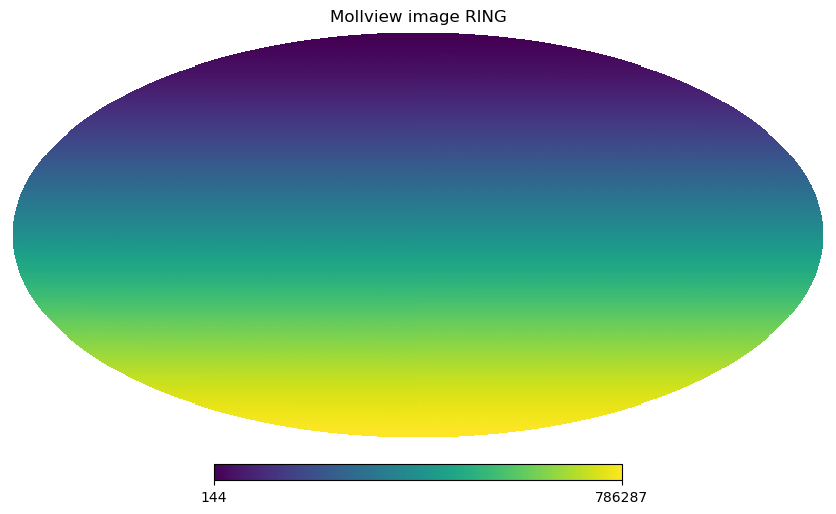

In [86]:
hp_map=np.arange(hp.nside2npix(n_side))
hp.mollview(hp_map,title='Mollview image RING')

- Data la posizione dell'oggetto, voglio conoscere in quale pixel cade.

In [87]:
hp.ang2pix(nside=256,theta=np.pi/2,phi=0.)

391680

**Esempi**:
- CMB;
- mappe di estinzione della polvere dalla galassia (*Galactic Dust Extinction Service*);
- *Dark Energy Survey* (effective density of weak lensing sources).

### Background

In [88]:
Omega_b=0.05
Omega_c=0.25

h=0.7
As=2.1e-9
ns=0.96

pars=camb.CAMBparams()
pars.set_cosmology(H0=100*h,ombh2=Omega_b*h**2,omch2=Omega_c*h**2)
pars.InitPower.set_params(As=As,ns=ns)

pars.set_matter_power(redshifts=[10.],kmax=10.)
results=camb.get_results(pars)

kh,z,pk=results.get_matter_power_spectrum(minkh=1e-4,maxkh=10,npoints=512)

### $C_\ell$

In [89]:
power=results.get_cmb_power_spectra(pars,CMB_unit='muK')
#power.keys()
C_l=power['unlensed_scalar'][:,0] #only the temperature one

ells=np.arange(len(C_l))

Text(0, 0.5, '$C_\\ell \\cdot \\ell (\\ell +1)/2 \\pi \\ [\\mu K^2]$')

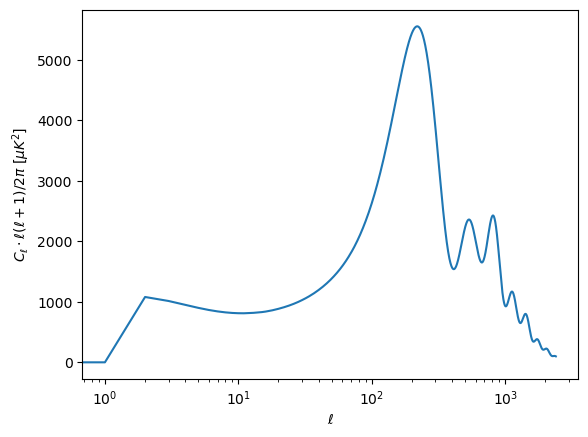

In [90]:
plt.semilogx(ells,C_l)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell \cdot \ell (\ell +1)/2 \pi \ [\mu K^2]$')

- $C_\ell$ non normalizzati, e in Kelvin

Text(0, 0.5, '$C_\\ell \\, [K^2]$')

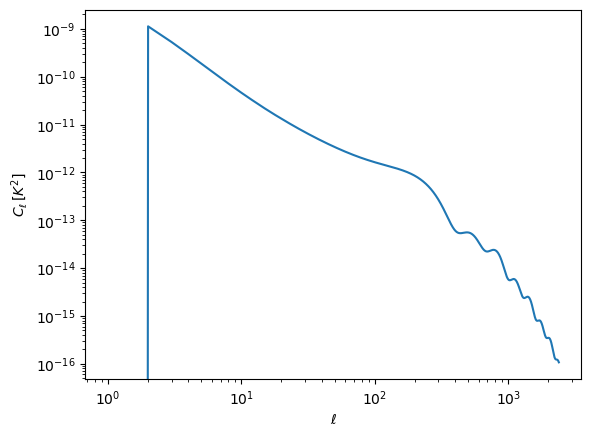

In [91]:
power=results.get_cmb_power_spectra(pars,CMB_unit='K',raw_cl=True)
C_l=power['unlensed_scalar'][:,0]
plt.loglog(ells,C_l)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell \, [K^2]$')

### $a_{lm}$

In [92]:
alms=hp.synalm(C_l)

Text(0, 0.5, '$C_\\ell \\, [K^2]$')

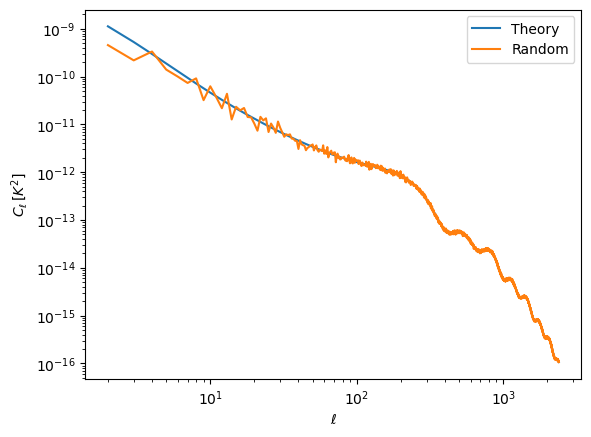

In [93]:
plt.loglog(ells[2:],C_l[2:],label='Theory')
plt.loglog(ells[2:],hp.alm2cl(alms)[2:],label='Random')
plt.legend(loc='upper right')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell \, [K^2]$')

### Mock Map

In [114]:
mock_map=hp.alm2map(alms,nside=1024)

In [115]:
hp.nside2pixarea(64,degrees=True) #degrees^2

0.8392936452111668

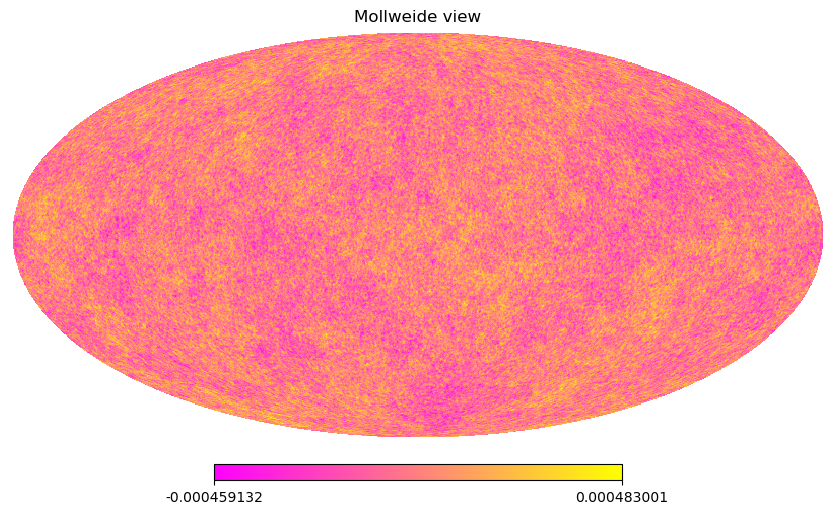

In [116]:
hp.mollview(mock_map,cmap='spring')

In [121]:
cl_meas=hp.anafast(mock_map,lmax=2048)
cl_meas.shape

(2049,)

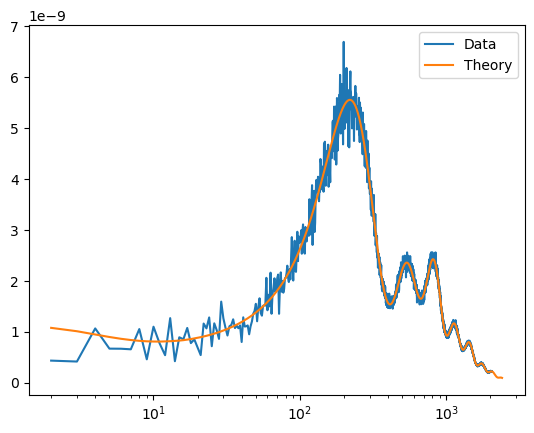

In [122]:
ell_meas=np.arange(len(cl_meas))
plt.semilogx(ell_meas[2:],cl_meas[2:]*ell_meas[2:]*(ell_meas[2:]+1)/(2*np.pi),label='Data')
plt.semilogx(ells[2:],C_l[2:]*ells[2:]*(ells[2:]+1)/(2*np.pi),label='Theory')
plt.legend()